# Z-Distribution <hr style = "border:2.5px solid #0000FF"></hr>

<b> Stephen Jay Paspie </b>
<br>Computer Engineering Tech. T09-A

In [1]:
#import and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv(r"csv\transformer-voltage.csv",
                 index_col='Sample',
                 delimiter=",")
df

,Voltage
Sample,
1,117.0
2,118.3
3,119.5
4,119.5
5,119.6
6,119.6
7,119.7
8,119.7
9,119.7


In [3]:
#summary of datafrane
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [4]:
#summary of statistics
df.describe()

,Voltage
count,30.000000
mean,120.290000
std,1.243285
min,117.000000
25%,119.700000
50%,120.100000
75%,120.500000
max,123.800000


In [5]:
# z-critical for two-tailed test
#95%
alpha = 0.05
z_critical = stats.norm.ppf(1-alpha/2)
z_critical

np.float64(1.959963984540054)

In [6]:
# z-critical for two-tailed test
#99%
alpha = 0.01
z_critical = stats.norm.ppf(1-alpha/2)
z_critical

np.float64(2.5758293035489004)

In [7]:
# z-critical for two-tailed test
#100%
alpha = 0.0
z_critical = stats.norm.ppf(1-alpha/2)
z_critical

np.float64(inf)

In [8]:
#confidence interval
pop_std = 5

ci_lower, ci_upper = stats.norm.interval(
    confidence=0.95,
    loc = df['Voltage'].mean(),
    scale = pop_std/np.sqrt(df['Voltage'].count())
    )

print(f"CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

CI: [118.50, 122.08]


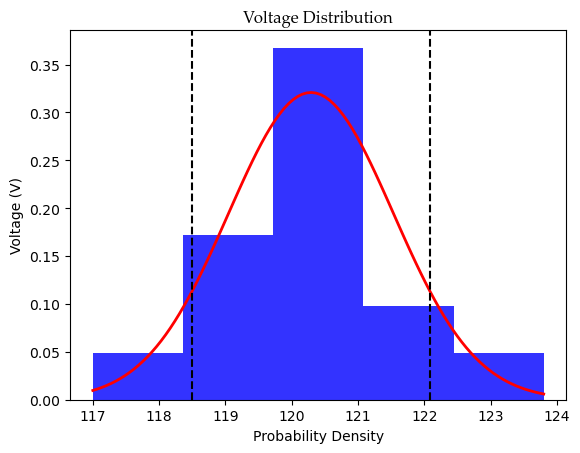

In [9]:
#voltage distribution

mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

#X-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

#normal distribution plot
x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x,p,
         color = "Red",
         linewidth = 2)

#histogram
plt.hist(df['Voltage'],
         bins=5,
         density=True,
         alpha=0.8,
         color='blue',)

plt.title('Voltage Distribution',
          font= 'Palatino Linotype',
          fontsize = 12)
plt.xlabel('Probability Density')
plt.ylabel('Voltage (V)')


#confidence Interval
plt.axvline(x=ci_lower,
            color = 'Black',
            linestyle = '--')

plt.axvline(x=ci_upper,
            color = 'Black',
            linestyle = '--')
plt.show()